In [1]:
import pandas as pd
import Red2
import numpy as np
%load_ext autoreload
%autoreload 2

In [2]:
testW = pd.read_pickle('digitos_pesos.pkl')
testB = pd.read_pickle('digitos_biases.pkl')

w = testW.get('pesos').values
b = testB.get('pesos').values

red = Red2.Red([784,10,10,10])

red.W = w
red.B = b


In [4]:
test_path = "data\\digit_test.csv"
test_data = pd.read_csv(test_path)

columnas = test_data.keys().values



In [5]:
test = test_data.get(columnas).values

[[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]]
El digito correspondiente es:  6


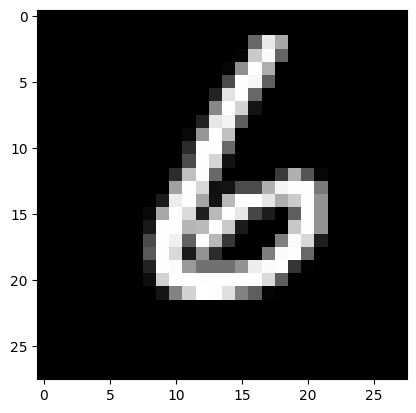

In [19]:
## Prueba individual para var que tan bien le va a ala red.
## Para elegir el digito, al final se elige el con seguridad mayor
import matplotlib.pyplot as plt

n1 = np.random.randint(0,2800)
prueba1 = test[n1].reshape(1,784)
fig, ax = plt.subplots(1,1)
res = red.EvaluarBatch(prueba1)
res_round = np.round(res.T)
posibilidades = []
i=0
print(res_round)
for var in res_round[0]:
    if var != 0:
        posibilidades.append(i)
    
    i+=1
prueba1 = prueba1.reshape(28,28)
plt.imshow(prueba1, cmap='gray')
max_prob=0
max = -1
for j in posibilidades:
    if res[j] > max_prob:
        max_prob = res[j]
        max = j
print("El digito correspondiente es: ", max)